environment

In [2]:
import numpy as np

# Constants
GOAL = 100  # the gambler's desired capital
INITIAL_CAPITAL = 1  # the gambler starts with $1

# The states are the gambler's capital: 1, 2, ... 99
STATES = np.arange(1, GOAL)  # excludes the terminal states 0 and 100

In [3]:
def expected_return(state, action, ph, V):
    """Compute expected return for a state-action pair.

    Args:
    - state: Current capital of the gambler.
    - action: Stake amount.
    - ph: Probability of the coin coming up heads.
    - V: Current value function.

    Returns:
    - Expected return for the state-action pair.
    """
    # Two outcomes: win with probability ph or lose with probability (1-ph)
    win_state = min(state + action, GOAL)
    lose_state = max(state - action, 0)

    # Rewards: +1 if the game ends with capital reaching the goal, 0 otherwise
    return ph * (1 if win_state == GOAL else 0 + V[win_state]) + (1 - ph) * V[lose_state]


#value iteration

In [10]:
def value_iteration(ph, theta=1e-8):
    """Perform value iteration for the gambler's problem.

    Args:
    - ph: Probability of the coin coming up heads.
    - theta: Threshold for value function convergence.

    Returns:
    - V: Final value function.
    """
    V = np.zeros(GOAL + 1)  # includes terminal states
    while True:
        delta = 0
        for state in STATES:
            v = V[state]
            # Calculate possible stake actions in current state
            stakes = np.arange(1, min(state, GOAL - state) + 1)
            values = [expected_return(state, action, ph, V) for action in stakes]
            V[state] = max(values)
            delta = max(delta, abs(v - V[state]))
        if delta < theta:
            break
    return V


In [11]:
def extract_policy(V, ph):
    """Extract the optimal policy using the value function.

    Args:
    - V: Value function.
    - ph: Probability of the coin coming up heads.

    Returns:
    - policy: Optimal policy.
    """
    policy = np.zeros(GOAL, dtype=int)  # excludes the terminal state 100
    for state in STATES:
        stakes = np.arange(1, min(state, GOAL - state) + 1)
        action_values = [expected_return(state, action, ph, V) for action in stakes]
        best_action = stakes[np.argmax(action_values)]
        policy[state] = best_action
    return policy


get results

In [12]:
import matplotlib.pyplot as plt

def plot_results(V, policy):
    """Plot the value function and policy."""
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(V)
    plt.xlabel('Capital')
    plt.ylabel('Value Estimates')
    plt.title('Value Function')

    plt.subplot(1, 2, 2)
    plt.scatter(STATES, policy[1:GOAL], s=10)
    plt.xlabel('Capital')
    plt.ylabel('Final Policy (Stake)')
    plt.title('Policy (Stake Size)')

    plt.tight_layout()
    plt.show()


p=0.49

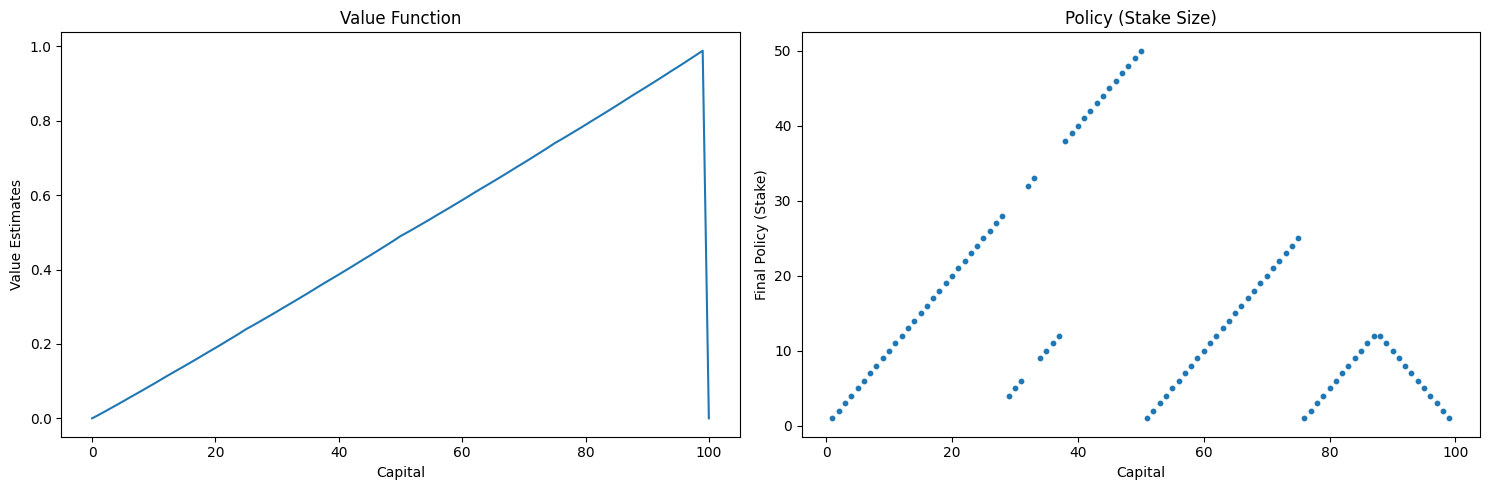

In [20]:
ph = 0.49  # given probability of heads
V = value_iteration(ph)
policy = extract_policy(V, ph)
plot_results(V, policy)


p=0.5

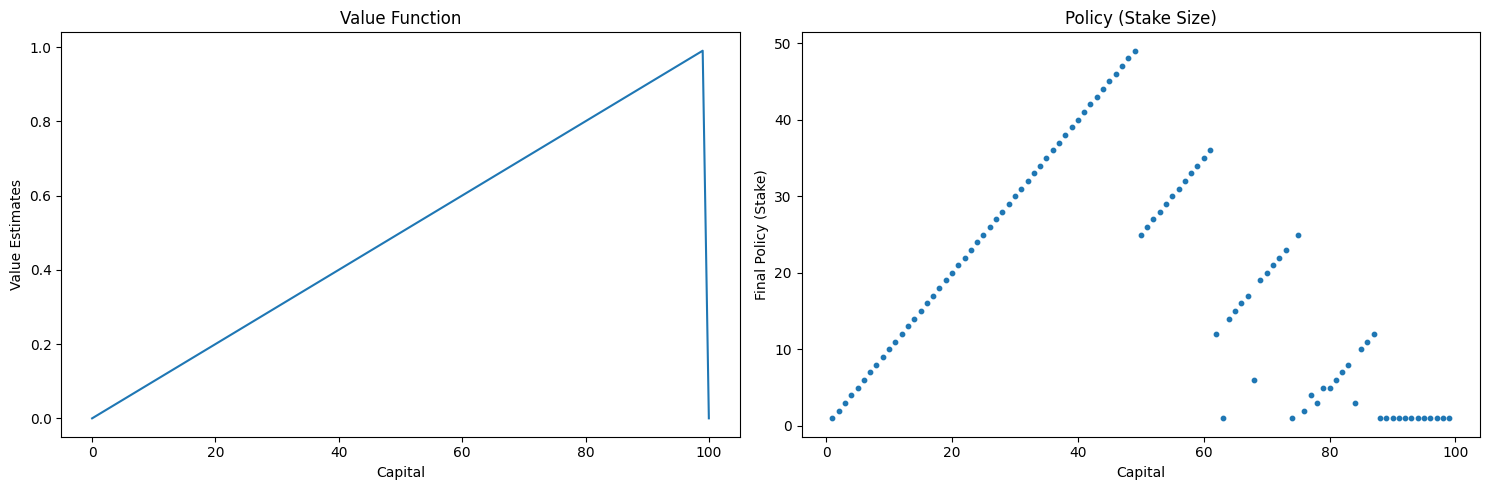

In [23]:
ph = 0.5  # given probability of heads
V = value_iteration(ph)
policy = extract_policy(V, ph)
plot_results(V, policy)


p=0.51

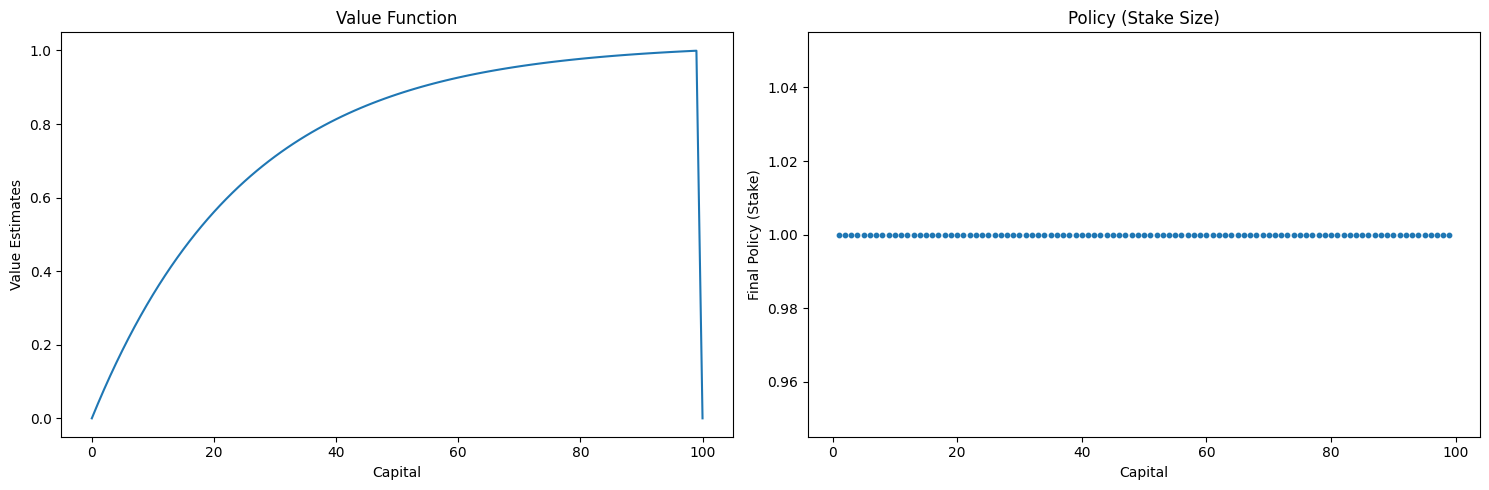

In [24]:
ph = 0.51  # given probability of heads
V = value_iteration(ph)
policy = extract_policy(V, ph)
plot_results(V, policy)


p=0.02

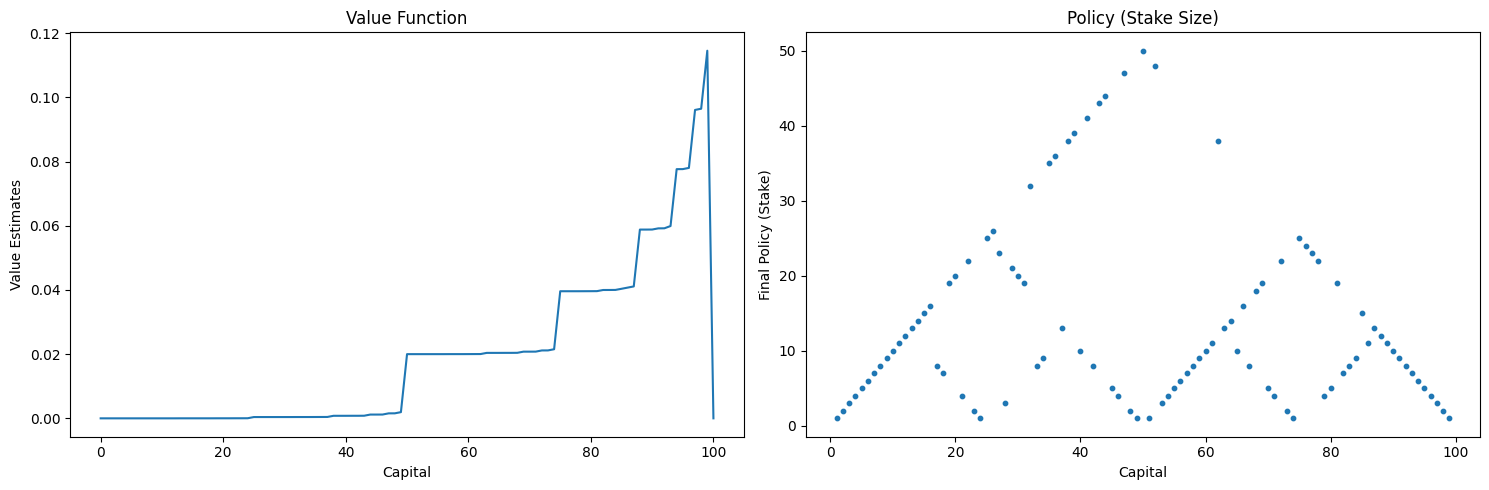

In [25]:
ph = 0.02  # given probability of heads
V = value_iteration(ph)
policy = extract_policy(V, ph)
plot_results(V, policy)
